## What is Elastic Net?

### Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression


### The Cost function

Elastic Net Cost Function:

`J(θ) = MSE(θ) + rα∑|θᵢ| + (1-r)/2 × α∑θᵢ²`

Where:

- MSE(θ): Mean Squared Error
- r `(l1_ratio)`: Mix ratio between L1 and L2 (0 ≤ r ≤ 1)
- α: Overall regularization strength

Elastic Net is often the best default choice for regularized linear regression because it provides a good balance between Lasso's feature selection and Ridge's stability, especially when you have correlated features or when the number of features exceeds the number of samples


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

In [4]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("Sample data generated:")
print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"First 5 X values: {X[:5].flatten()}")
print(f"First 5 y values: {y[:5].flatten()}")

Sample data generated:
X shape: (100, 1), y shape: (100, 1)
First 5 X values: [0.74908024 1.90142861 1.46398788 1.19731697 0.31203728]
First 5 y values: [6.33428778 9.40527849 8.48372443 5.60438199 4.71643995]


In [5]:
# 2. create and configure elastic net model
elastic_net = ElasticNet(
    alpha=0.1,  # regularization strength
    l1_ratio=0.5,  # 50% lasso, 50% ridge
    random_state=42,
)

print(
    f"\nModel created with alpha={elastic_net.alpha}, l1_ratio={elastic_net.l1_ratio}"
)

# train the model
elastic_net.fit(X, y.ravel())  # ravel() converts y to 1D array

print(f"Learned weights: {elastic_net.coef_}")
print(f"Bias term: {elastic_net.intercept_}")


Model created with alpha=0.1, l1_ratio=0.5
Learned weights: [2.29939031]
Bias term: 4.657746009455282


In [6]:
# make predictions
X_new = np.array([[1.5]])  # new data point
prediction = elastic_net.predict(X_new)

print(f"\nPrediction for X={X_new[0][0]}: {prediction[0]:.4f}")

# model parameters
print("\n=== Model Summary ===")
print(f"Equation: y = {elastic_net.intercept_:.4f} + {elastic_net.coef_[0]:.4f}*x")
print(f"Regularization: L1 + L2 (50% each)")
print(f"Alpha: {elastic_net.alpha}")
print(f"L1 Ratio: {elastic_net.l1_ratio}")


Prediction for X=1.5: 8.1068

=== Model Summary ===
Equation: y = 4.6577 + 2.2994*x
Regularization: L1 + L2 (50% each)
Alpha: 0.1
L1 Ratio: 0.5


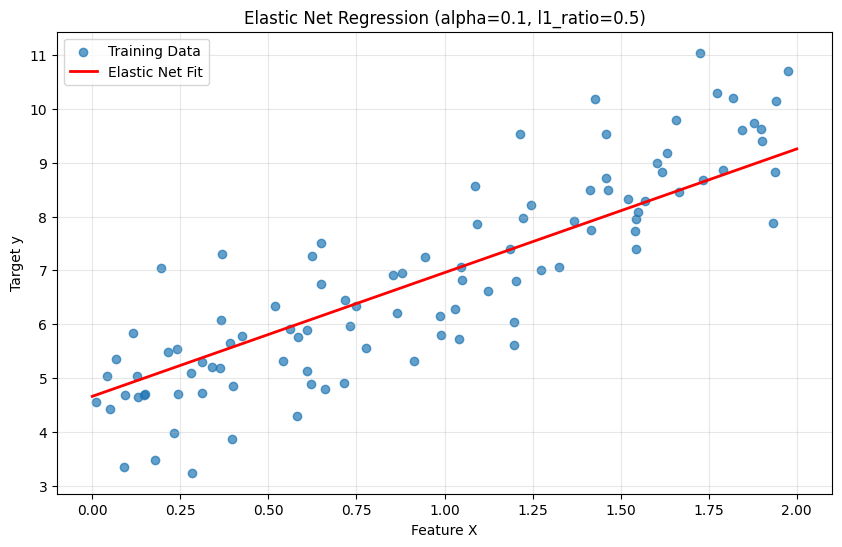

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label="Training Data")

X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
y_plot = elastic_net.predict(X_plot)
plt.plot(X_plot, y_plot, "r-", linewidth=2, label="Elastic Net Fit")

plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Elastic Net Regression (alpha=0.1, l1_ratio=0.5)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Key Advantages

- Feature selection: Like Lasso, can set some weights to zero
- Stability: Like Ridge, handles correlated features well
- Flexibility: Tunable blend between L1 and L2 regularization
- Robustness: Works well in various scenarios
